In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
from astropy.table import Table
import scipy.interpolate as interp 
import george 
from george import kernels

In [3]:
dat_ps1_g = Table.read('2020jfo_ps1_g.dat', format='ascii', data_start=2, names=('mjd','mag','err','pb', 'magsys'))
dat_ps1_i = Table.read('2020jfo_ps1_i.dat', format='ascii', data_start=2, names=('mjd','mag','err','pb', 'magsys'))
dat_ps1_r = Table.read('2020jfo_ps1_r.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ps1_z = Table.read('2020jfo_ps1_z.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ztfg = Table.read('2020jfo_ztfg.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ztfr = Table.read('2020jfo_ztfr.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_gp = Table.read('2020jfo_gp.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_ip = Table.read('2020jfo_ip.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))
dat_rp = Table.read('2020jfo_rp.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))

In [4]:
def lc(object):
    plt.errorbar(object['mjd'], object['mag'], object['err'], linestyle = 'None', marker = '.')
    plt.gca().invert_yaxis()

In [5]:
def gp(object):
    x = object['mjd']
    y = object['mag']
    yerr = object['err']    
    f = interp.interp1d(x, y, kind = 'linear')
    class mean_fxn:
        def __init__(self, f):
            self.f = f
        def get_value(self, x):
            return self.f(x)
    meanf = mean_fxn(f) 
    kernel = (np.mean(yerr) ** 2.) * kernels.Matern32Kernel(1e6)
    gp = george.GP(mean = meanf, kernel = kernel) 
    gp.compute(x, yerr)
    x_pred = np.linspace(x.min(), x.max(), 700)
    y_mean = f(x_pred)
    pred, pred_var = gp.predict(y, x_pred, return_var = True)
    
    plt.figure()
    plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color = 'k', alpha = 0.2)
    plt.plot(x_pred, y_mean, 'r-')
    plt.plot(x_pred, pred, 'k', lw = 1.5, alpha = 0.5)
    plt.errorbar(x, y, yerr = yerr, fmt = '.k', capsize = 0)
    plt.xlabel('MJD')
    plt.ylabel('Luminosity')
    plt.gca().invert_yaxis()
    plt.show()

### PS1.g

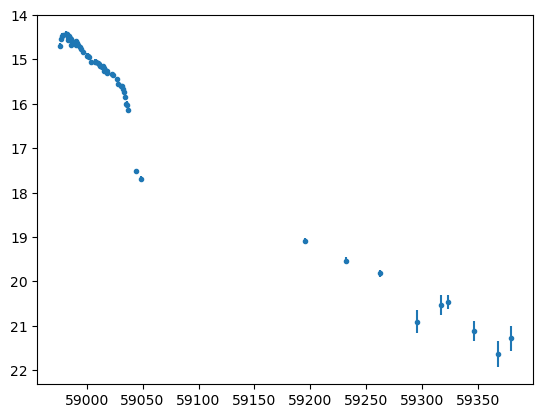

In [6]:
lc(dat_ps1_g)

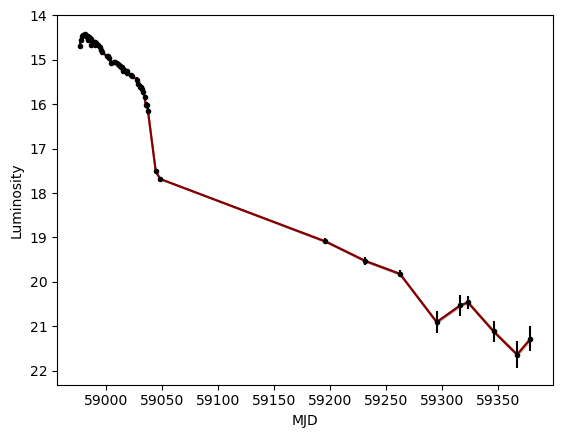

In [7]:
gp(dat_ps1_g)

### PS1.i

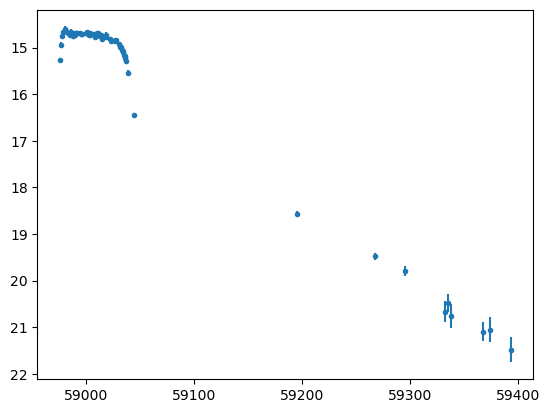

In [8]:
lc(dat_ps1_i)

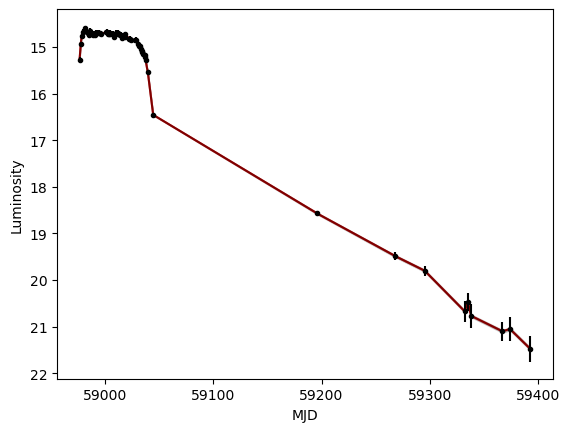

In [9]:
gp(dat_ps1_i)

### PS1.zr

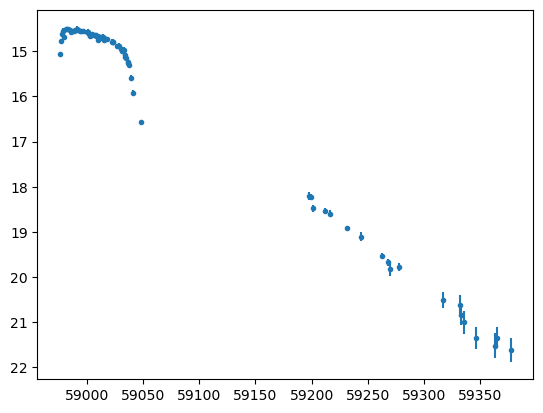

In [10]:
lc(dat_ps1_r)

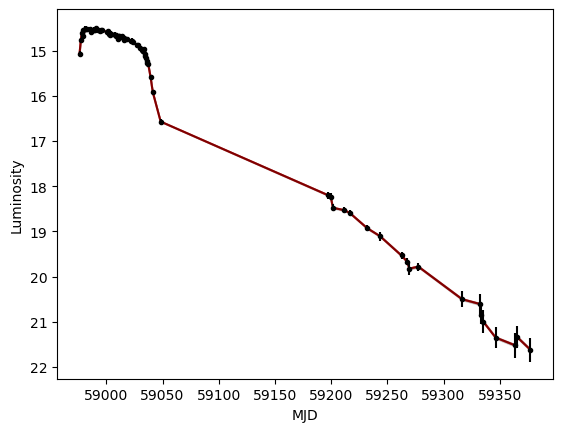

In [11]:
gp(dat_ps1_r)

### PS1.z

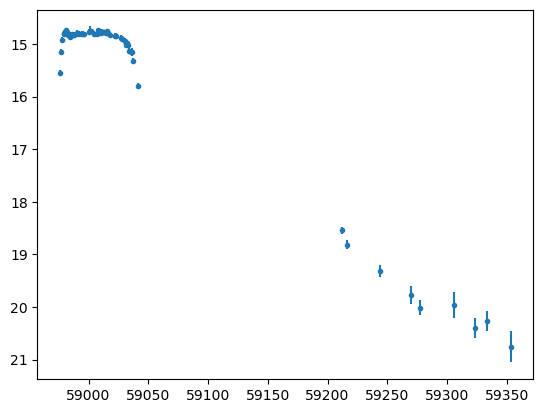

In [12]:
lc(dat_ps1_z)

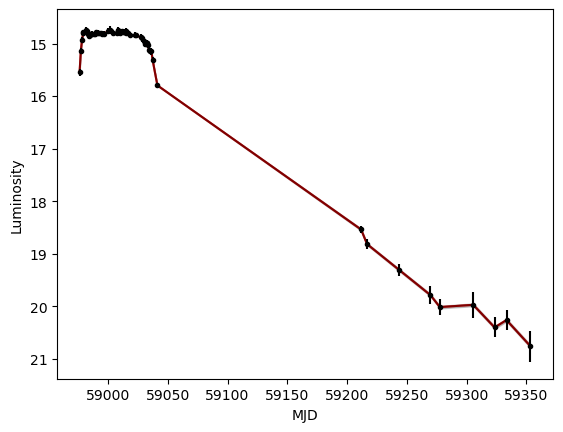

In [13]:
gp(dat_ps1_z)

### ZTF.g

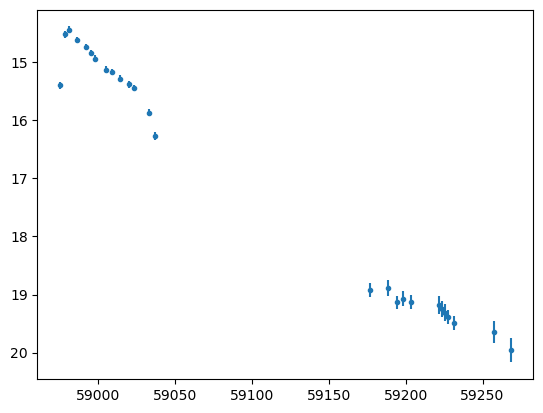

In [14]:
lc(dat_ztfg)

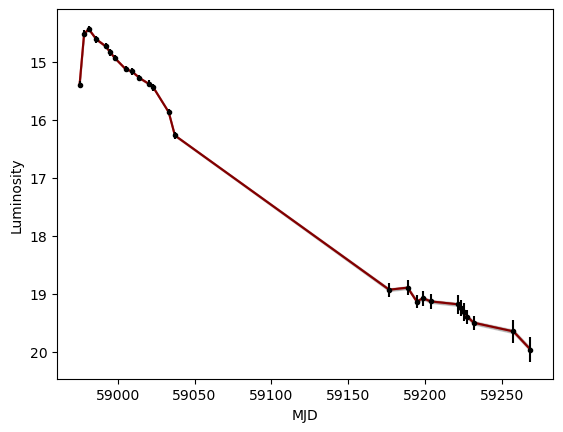

In [15]:
gp(dat_ztfg)

### ZTF.r

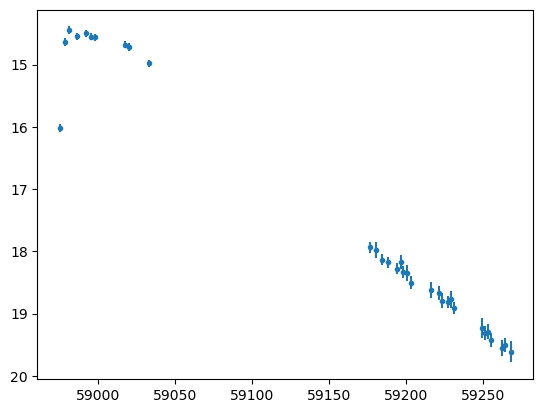

In [16]:
lc(dat_ztfr)

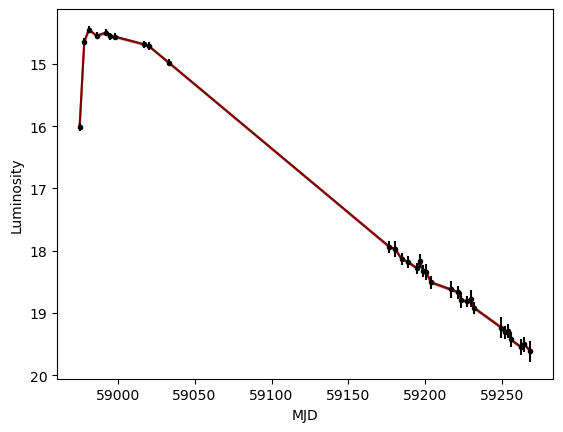

In [17]:
gp(dat_ztfr)

### gprime

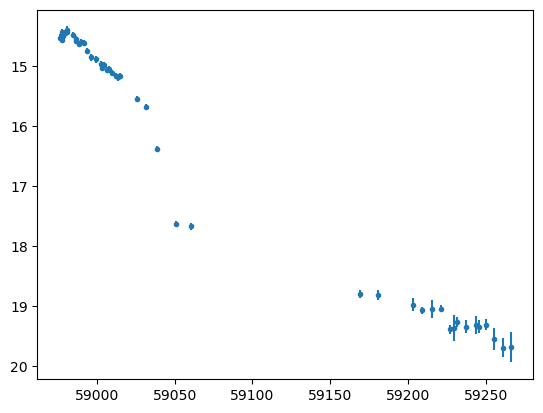

In [18]:
lc(dat_gp)

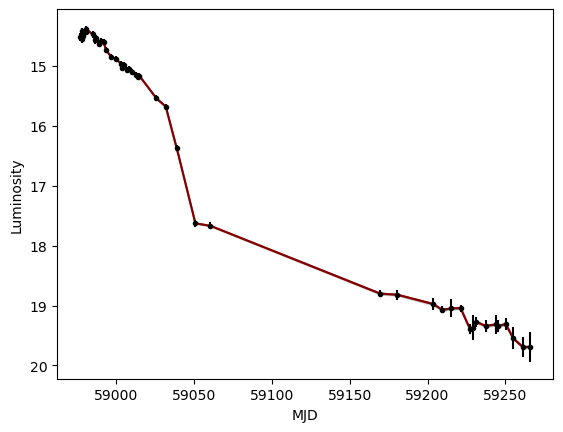

In [19]:
gp(dat_gp)

### iprime

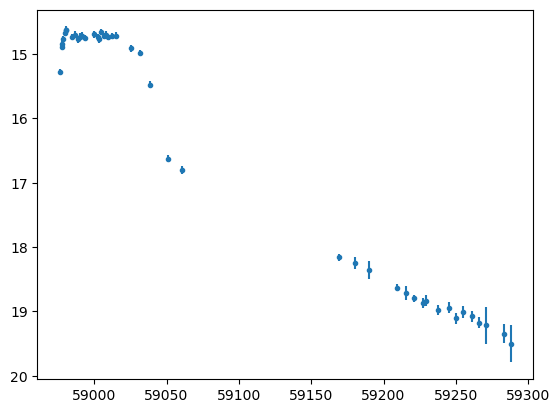

In [20]:
lc(dat_ip)

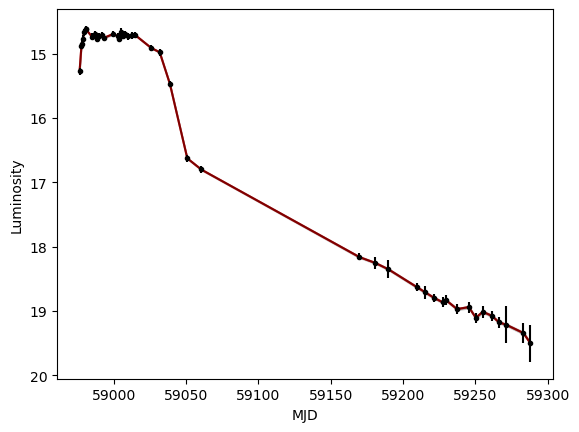

In [21]:
gp(dat_ip)

### rprime

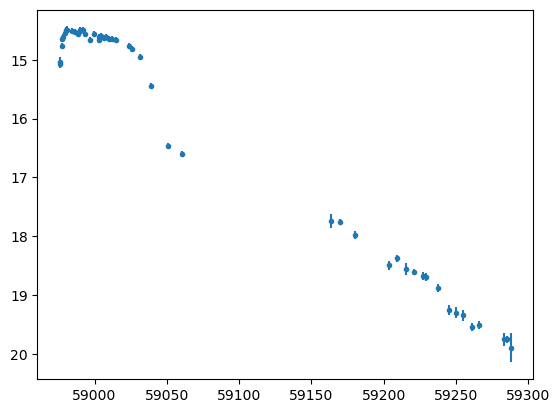

In [22]:
lc(dat_rp)

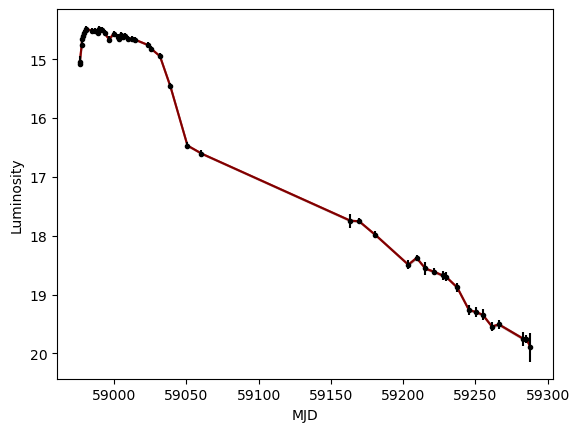

In [23]:
gp(dat_rp)

In [24]:
dat_20jfo = Table.read('2020jfo.dat', format = 'ascii', data_start = 2, names = ('mjd', 'mag', 'err', 'pb', 'magsys'))

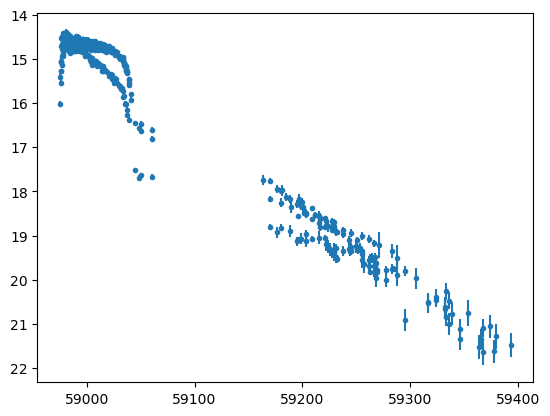

In [25]:
lc(dat_20jfo)

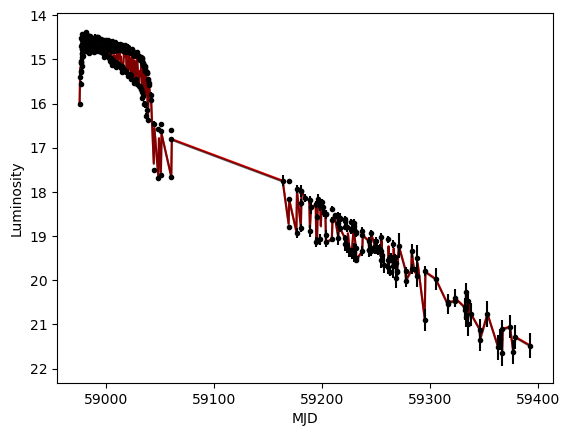

In [26]:
gp(dat_20jfo)

In [27]:
def multi_lc(object):
    x = object['mjd']
    y = object['mag']
    yerr = object['err']
    filters = object['pb']
    for i,filt in enumerate(np.unique(filters)):
        mask = object['pb'] == filt
        cmap = plt.get_cmap('tab10')
        color = cmap(i)
        l = plt.errorbar(x[mask], y[mask], yerr=yerr[mask], linestyle = 'none', marker = '.', color = color)
    plt.gca().invert_yaxis()

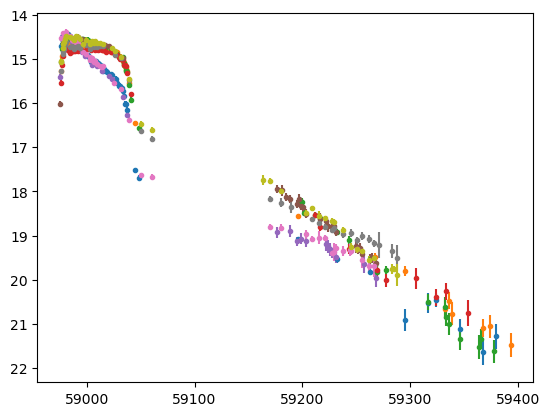

In [28]:
multi_lc(dat_20jfo)

In [29]:
def multi_gp(object):
    filters = object['pb']
    plt.figure()
    for i, filt in enumerate(np.unique(filters)):
        cmap = plt.get_cmap('tab10')
        color = cmap(i)
        mask = object['pb'] == filt
        x = object['mjd'][mask]
        y = object['mag'][mask]
        yerr = object['err'][mask]    
        f = interp.interp1d(x, y, kind = 'linear')
        class mean_fxn:
            def __init__(self, f):
                self.f = f
            def get_value(self, x):
                return self.f(x)
        meanf = mean_fxn(f) 
        kernel = (np.mean(yerr) ** 2.) * kernels.Matern32Kernel(1e6)
        gp = george.GP(mean = meanf, kernel = kernel) 
        gp.compute(x, yerr)
        x_pred = np.linspace(x.min(), x.max(), 700)
        y_mean = f(x_pred)
        pred, pred_var = gp.predict(y, x_pred, return_var = True)
        
        plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color = 'k', alpha = 0.2)
        #plt.plot(x_pred, y_mean, linestyle = '--', color = color)
        plt.plot(x_pred, pred, color = color, lw = 1.5, alpha = 0.5)
        plt.errorbar(x, y, yerr = yerr, fmt='.',capsize = 0, color = color)
    plt.xlabel('MJD')
    plt.ylabel('Luminosity')
    plt.gca().invert_yaxis()
    plt.show()

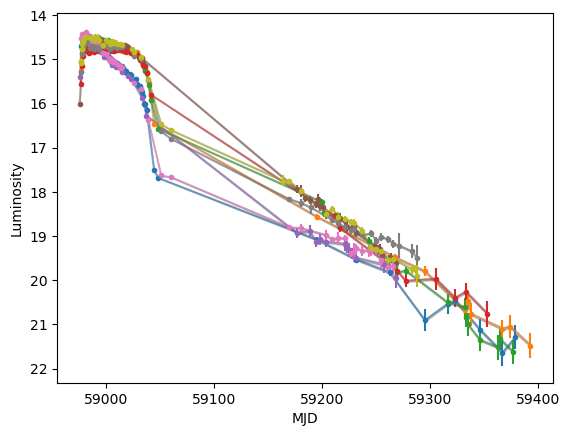

In [30]:
multi_gp(dat_20jfo)

In [31]:
def multi_gp_cubic(object):
    filters = object['pb'] 
    plt.figure()
    for i, filt in enumerate(np.unique(filters)):
        cmap = plt.get_cmap('tab10')
        color = cmap(i)
        mask = object['pb'] == filt
        x = object['mjd'][mask]
        y = object['mag'][mask]
        yerr = object['err'][mask]
        sorted_idx = np.argsort(x)
        sorted_time =x[sorted_idx]
        sorted_mag = y[sorted_idx]
        f = interp.CubicSpline(sorted_time, sorted_mag)
        class mean_fxn:
            def __init__ (self, f):
                self.f  = f
            def get_value(self, x):
                return self.f(x)
        mean = mean_fxn(f)
        kernel = (np.mean(yerr) ** 2) * george.kernels.Matern32Kernel(1e6) 
        gp = george.GP(mean = mean, kernel = kernel)
        gp.compute(x, yerr)
        x_pred = np.linspace(x.min(), x.max(), 700)
        y_mean = f(x_pred)
        pred, pred_var = gp.predict(y, x_pred, return_var= True)
        
        plt.fill_between(x_pred, pred - np.sqrt(pred_var), pred + np.sqrt(pred_var), color = 'k', alpha = 0.2)
        plt.plot(x_pred, y_mean, linestyle = 'dashed', color = color)
        plt.plot(x_pred, pred, color = color, lw = 1.5, alpha = 0.5)
        plt.errorbar(x, y, yerr = yerr, fmt = '.', capsize=0, color = color)
    plt.xlabel('MJD')
    plt.ylabel('Luminosity')
    plt.gca().invert_yaxis()
    plt.show()

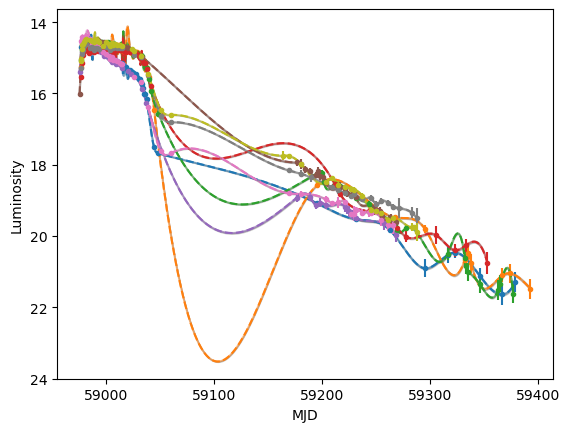

In [32]:
multi_gp_cubic(dat_20jfo)